In [1]:
from time import sleep
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_sodium',
       'sex', 'smoking', 'time', 'DEATH_EVENT'],
      dtype='object')


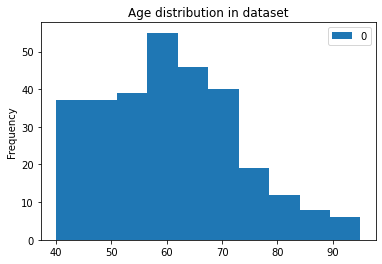

In [7]:
cols = [
    "age",
    "anaemia",
    "DEATH_EVENT",
    "diabetes",
    "creatinine_phosphokinase",
    "ejection_fraction",
    "high_blood_pressure",
    "platelets",
    "serum_sodium",
    "sex",
    "smoking",
    "time",
]
df = pd.read_csv("heart_failure.csv", usecols=cols)
print(df.columns)
a = pd.DataFrame(df["age"].to_numpy())
a.plot.hist(title="Age distribution in dataset")

plt.show()

# Categorical encoding

In [6]:
cols = [
    "age",
    "anaemia",
    "DEATH_EVENT",
    "diabetes",
    "creatinine_phosphokinase",
    "ejection_fraction",
    "high_blood_pressure",
    "platelets",
    "serum_sodium",
    "sex",
    "smoking",
    "time",
]
# list of columns in dataset with categorical data
cat_list=[
    "anaemia", 
    "diabetes",
    "high_blood_pressure",
    "sex",
    "smoking",
]
df = pd.read_csv("heart_failure.csv", usecols=cols)
labelencoder=LabelEncoder()
for cat in cat_list:
    df[cat+"_cat"]=labelencoder.fit_transform(df[cat])
    df.drop(columns=cat)#does not drop tables for some reason, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

df


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_sodium,sex,smoking,time,DEATH_EVENT,anaemia_cat,diabetes_cat,high_blood_pressure_cat,sex_cat,smoking_cat
0,75.0,No,582,No,20,Yes,265000.00,130,Male,No,4,1,0,0,1,1,0
1,55.0,No,7861,No,38,No,263358.03,136,Male,No,6,1,0,0,0,1,0
2,65.0,No,146,No,20,No,162000.00,129,Male,Yes,7,1,0,0,0,1,1
3,50.0,Yes,111,No,20,No,210000.00,137,Male,No,7,1,1,0,0,1,0
4,65.0,Yes,160,Yes,20,No,327000.00,116,Female,No,8,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,No,61,Yes,38,Yes,155000.00,143,Male,Yes,270,0,0,1,1,1,1
295,55.0,No,1820,No,38,No,270000.00,139,Female,No,271,0,0,0,0,0,0
296,45.0,No,2060,Yes,60,No,742000.00,138,Female,No,278,0,0,1,0,0,0
297,45.0,No,2413,No,38,No,140000.00,140,Male,Yes,280,0,0,0,0,1,1


In [6]:
df.groupby(["age", "DEATH_EVENT"]).mean()

creatinine_phosphokinase  ejection_fraction      platelets  \
age  DEATH_EVENT                                                               
40.0 0                          321.142857          36.428571  262428.571429   
41.0 0                          148.000000          40.000000  374000.000000   
42.0 0                         1017.833333          39.166667  249226.338333   
     1                          250.000000          15.000000  213000.000000   
43.0 0                          358.000000          50.000000  237000.000000   
...                                    ...                ...            ...   
87.0 1                          149.000000          38.000000  262000.000000   
90.0 0                          337.000000          38.000000  390000.000000   
     1                           53.500000          45.000000  215000.000000   
94.0 1                          582.000000          38.000000  263358.030000   
95.0 1                          241.500000          35.000000  328500.000000   

                  serum_sodium        time  anaemia_cat  diabetes_cat  \
age  DEATH_EVENT                                                        
40.0 0              137.714286  198.285714     0.285714      0.285714   
41.0 0              140.000000   68.000000     0.000000      0.000000   
42.0 0              137.333333  156.500000     0.166667      0.166667   
     1              136.000000   65.000000     1.000000      1.000000   
43.0 0              135.000000   97.000000     1.000000      0.000000   
...                        ...         ...          ...           ...   
87.0 1              140.000000   14.000000     1.000000      0.000000   
90.0 0              144.000000  256.000000     1.000000      0.000000   
     1              133.000000   19.000000     1.000000      0.500000   
94.0 1              134.000000   27.000000     0.000000      1.000000   
95.0 1              135.000000   37.000000     1.000000      0.000000   

                  high_blood_pressure_cat   sex_cat  smoking_cat  
age  DEATH_EVENT                                                  
40.0 0                           0.142857  0.714286     0.285714  
41.0 0                           0.000000  1.000000     1.000000  
42.0 0                           0.000000  0.833333     0.500000  
     1                           0.000000  0.000000     0.000000  
43.0 0                           0.000000  0.000000     0.000000  
...                                   ...       ...          ...  
87.0 1                           0.000000  1.000000     0.000000  
90.0 0                           0.000000  0.000000     0.000000  
     1                           0.500000  1.000000     0.500000  
94.0 1                           1.000000  1.000000     0.000000  
95.0 1                           0.500000  0.500000     0.000000  

[73 rows x 10 columns]

<AxesSubplot:title={'center':'Sex distribution of records in dataset'}>

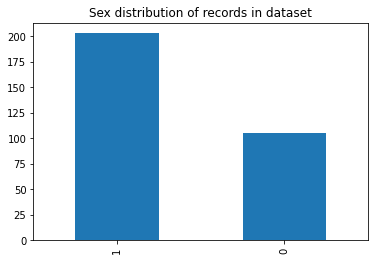

In [7]:
df.DEATH_EVENT.value_counts().plot(kind="bar", title="Number of records with death event reegistered")

<AxesSubplot:title={'center':'Sex distribution of records in dataset'}>

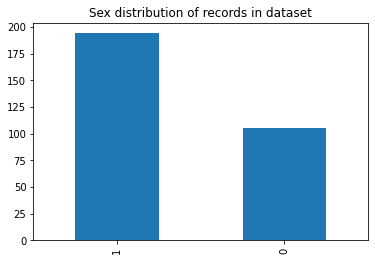

In [8]:
# using the newly encoded *_cat column
df.sex_cat.value_counts().plot(kind="bar", title="Sex distribution of records in dataset")